<a href="https://colab.research.google.com/github/ROzenSaglam/MLprojects1/blob/main/Image_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install labelme tensorflow opencv-python matplotlib albumentations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 11.8 MB/s 
     |████████████████████████████████| 7.7 MB 83.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 83 kB 2.1 MB/s 
     |████████████████████████████████| 8.4 MB 82.5 MB/s 
     |████████████████████████████████| 361 kB 50.9 MB/s 
     |████████████████████████████████| 59.9 MB 1.2 MB/s 
  Created wheel for labelme: filename=labelme-5.1.1-py3-none-any.whl size=1466366 sha256=8b76f8656f6b6adc99ed844dc2b0e889dfba60ed065c55a813981a4f6a9c5295
  Stored in directory: /root/.cache/pip/wheels/73/89/84/442d4814015c451509500658c0cbe3aff0ccfaf09753246243
  Created wheel for imgviz: filename=imgviz-1.6.2-py3-none-any.whl size=7681466 sha256=4c73b6b18be063fc733e5dd219af02c3eb8e9358692485e9be6aef0850c6ef46
  Stored in dire

In [1]:
# 1. Collecting Images

import os
import time
import uuid
import cv2

print("Successfully imported!")

Successfully imported!


In [2]:
import json
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf


In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
image_path = os.path.join('data','image')
number_images = 30

In [ ]:
tf.config.list_physical_devices('GPU')

[]

In [ ]:
images = tf.data.Dataset.list_files('/content/drive/MyDrive/data/image/*.jpg', shuffle = False)

InvalidArgumentError: ignored

In [ ]:
images.as_numpy_iterator().next()

NameError: ignored

In [4]:
#to read an image, decode it and reshape the tensor containing the pixel data:

def load_image(x):
  raw = tf.io.read_file(x)
  img = tf.image.decode_jpeg(raw)

  return img

In [ ]:
images = images.map(load_image)

NameError: ignored

In [ ]:
images.as_numpy_iterator().next()


NameError: ignored

In [ ]:
image_generator = images.batch(4).as_numpy_iterator()

NameError: ignored

In [ ]:
plt_img = image_generator.next()

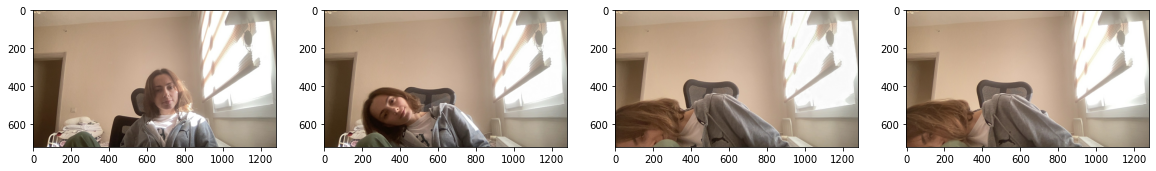

In [ ]:
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for idx, image in enumerate(plt_img):
  ax[idx].imshow(image)
plt.show()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls "/content/drive/My Drive"


'Başlıksız e-tablo.gsheet'
'CHARACTERIZATION OF IPN BASED LEVAN.docx'
'CHARACTERIZATION OF IPN BASED LEVAN ETO.docx'
'CIRRICULUM VITAE.docx'
'Colab Notebooks'
 data
'revised manuscript compressed_SG.docx'
'revised manuscript.docx'
'Saglam et al manuscript ETO.docx'
'WhatsApp Image 2022-06-27 at 18.11.54.jpeg'


In [5]:
#moving matching labels:

for folder in ['train', 'test', 'valid']:
  for file in os.listdir(os.path.join('drive','MyDrive','data', folder, 'image')):
    filename = file.split('.')[0]+'.json'
    existing_filepath = os.path.join('drive','MyDrive','data', 'label', filename)
    if os.path.exists(existing_filepath):
      new_filepath = os.path.join('drive','MyDrive','data', folder, 'label', filename)
      os.replace(existing_filepath, new_filepath)

Apply Image Augmentation on Images and Labels

In [4]:
import albumentations as alb

Augmentation Pipeline:

In [5]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

augmentor = alb.Compose([alb.HorizontalFlip(p=0.5),
             alb.RandomBrightnessContrast(p=0.3),
             alb.RandomCrop(width=700, height=700)],
             bbox_params=alb.BboxParams(format='albumentations', label_fields = ['class_labels']))


Test an Image & Annotation

In [7]:
img = cv2.imread(os.path.join('drive','MyDrive','data','train','image','27f557a6-850c-11ed-95e4-1e00f1349d90.jpg'))

with open(os.path.join('drive','MyDrive','data','train','label','27f557a6-850c-11ed-95e4-1e00f1349d90.json'), 'r') as f:
  label = json.load(f)


In [8]:
type(img)

numpy.ndarray

In [11]:
img

array([[ 76,  87, 101],
       [ 73,  84,  98],
       [ 90,  99, 113],
       ...,
       [125, 131, 136],
       [129, 135, 140],
       [122, 128, 133]], dtype=uint8)

In [62]:
filee = '27f557a6-850c-11ed-95e4-1e00f1349d90.jpg'
new_file = (filee.split('.'))[0]
new_file
name = f'{new_file}.json'
name

'27f557a6-850c-11ed-95e4-1e00f1349d90.json'

In [8]:
label['shapes'][0]['points']

[[528.3720930232558, 153.60465116279073],
 [787.6744186046512, 496.62790697674416]]

take the coordinates as a list from the dict 'label'

In [10]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [11]:
coords

[528.3720930232558, 153.60465116279073, 787.6744186046512, 496.62790697674416]

normalize the coordinates by dividing x with width and y with height of the image

In [93]:
type(img)

(720, 1280, 3)

In [12]:
coords = list(np.divide( coords, [1280,720,1280,720]))

In [13]:
coords

[0.4127906976744186,
 0.21333979328165378,
 0.6153706395348838,
 0.6897609819121446]

In [14]:
type(coords)

list

try augmentation pipeline

In [97]:
type(img)

numpy.ndarray

In [12]:
aug = augmentor(image = img, bboxes=[coords], class_labels = ['face'])
cv2.rectangle(aug['image'],
              tuple(np.multiply(aug['bboxes'][0][:2], [700,700]).astype(int)),
              tuple(np.multiply(aug['bboxes'][0][2:], [700,700]).astype(int)),
              (0,255,0),2)

NameError: ignored

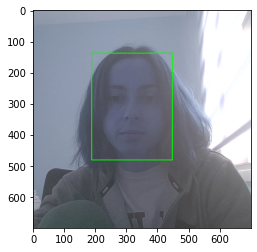

In [105]:
plt.imshow(aug['image'])

Build an Augmentation Pipeline for all images

In [30]:
labels = []
type(labels)

list

In [ ]:
filee = '27f557a6-850c-11ed-95e4-1e00f1349d90.jpg'
new_file = (filee.split('.'))[0]
new_file
name = f'{new_file}.json'
name

In [69]:


for folder in ['train', 'test', 'valid']:
  for files in os.listdir(os.path.join('drive','MyDrive','data', folder, 'image')):
    img = cv2.imread(os.path.join('drive','MyDrive','data', folder,'image', files))
    label_path = os.path.join('drive','MyDrive','data', folder,'label', f'{(files.split("."))[0]}.json')
    coords = [0,0,0.000001,0.000001]
    if os.path.exists(label_path):
      with open(label_path, 'r') as f:
        label = json.load(f)
      coords[0] = label['shapes'][0]['points'][0][0]
      coords[1] = label['shapes'][0]['points'][0][1]
      coords[2] = label['shapes'][0]['points'][1][0]
      coords[3] = label['shapes'][0]['points'][1][1]
      coords = list(np.divide(coords, [1280, 720, 1280, 720]))
      
    try:
      for x in range(60):
        augmented = augmentor(image = img, bboxes = [coords], class_labels = ['face'])
        cv2.imwrite(os.path.join('drive','MyDrive','data','aug_data',folder,'image', f'{(files.split("."))[0]}_{x}.jpg'), augmented['image'])
        annotation = {}
        annotation['image'] = files
        if os.path.exists(label_path):
          if len(augmented['bboxes']) == 0:
            annotation['bbox'] = [0,0,0,0]
            annotation['class'] = 0 
          else:
            annotation['bbox'] = augmented['bboxes'][0]
            annotation['class'] = 1
        else:
          annotation['bbox'] = [0,0,0,0]
          annotation['class'] = 0

        with open(os.path.join('drive','MyDrive','data','aug_data',folder,'label', f'{(files.split("."))[0]}_{x}.json'), 'w') as f:
          json.dump(annotation, f)
    except Exception as e:
      print(e)
    

   
    

Define a image resizing funtion for your images

In [3]:
  def normalize_image(image):
    return tf.image.resize(image, (120,120))


In [ ]:
#to read an image, decode it and reshape the tensor containing the pixel data:

def load_image(x):
  raw = tf.io.read_file(x)
  img = tf.image.decode_jpeg(raw)

  return img

# Load the files, 
#turn them into TensorSliceDataset 
#and normalize the image size and color::

In [36]:


for files in os.listdir(os.path.join('drive','MyDrive','data','aug_data', 'train', 'image')):
 
  try:
    train_images = tf.data.Dataset.list_files(os.path.join('drive','MyDrive','data','aug_data', 'train', 'image', files), shuffle = False)
    train_images = train_images.map(load_image)
    train_images = train_images.map(normalize_image)
    train_images = train_images.map(lambda x: x/255)
 
  except Exception as e :
    print(e)





In [11]:
for files in os.listdir(os.path.join('drive','MyDrive','data','aug_data', 'test', 'image')):
 
  try:
    test_images = tf.data.Dataset.list_files(os.path.join('drive','MyDrive','data','aug_data', 'test', 'image', files), shuffle = False)
    test_images = test_images.map(load_image)
    test_images = test_images.map(normalize_image)
    test_images = test_images.map(lambda x: x/255)
 
  except Exception as e :
    print(e)



In [12]:
for files in os.listdir(os.path.join('drive','MyDrive','data','aug_data', 'valid', 'image')):
  
  try:
    valid_images = tf.data.Dataset.list_files(os.path.join('drive','MyDrive','data','aug_data', 'valid', 'image', files), shuffle = False)
    valid_images = valid_images.map(load_image)
    valid_images = valid_images.map(normalize_image)
    valid_images = valid_images.map(lambda x: x/255)
  
  except Exception as e :
    print(e)

In [35]:
len(train_images),len(valid_images),len(test_images)

NameError: ignored

# Load the labels, return the class and bboxes data :

In [31]:

def read_label(label_path):
  with open(label_path.numpy(), 'r', encoding= 'utf-8') as f:
    label = json.load(f)

  return [label['class']], label['bbox']
  

In [20]:
read_label("/content/drive/MyDrive/data/aug_data/train/label/27f557a6-850c-11ed-95e4-1e00f1349d90_0.json")


([1],
 [0.18053156146179405,
  0.2137209302325582,
  0.5509634551495017,
  0.7037541528239202])

In [33]:
train_labels = tf.data.Dataset.list_files("/content/drive/MyDrive/data/aug_data/train/label/*.json", shuffle = False)
train_labels = train_labels.map(lambda x: tf.py_function(func = read_label, inp = [x], Tout = [tf.uint8, tf.float16]))

valid_labels = tf.data.Dataset.list_files("/content/drive/MyDrive/data/aug_data/valid/label/*.json", shuffle = False)
valid_labels = valid_labels.map(lambda x: tf.py_function(func = read_label, inp = [x], Tout = [tf.uint8, tf.float16]))

test_labels = tf.data.Dataset.list_files("/content/drive/MyDrive/data/aug_data/test/label/*.json", shuffle = False)
test_labels = test_labels.map(lambda x: tf.py_function(func = read_label, inp = [x], Tout = [tf.uint8, tf.float16]))


In [34]:
test_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.5273, 0.4678, 0.7056, 0.7466], dtype=float16))

COmbine Label and Image Samples